<a href="https://colab.research.google.com/github/soowanchoi/swanscodex/blob/main/swanscodex_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (using Empirical Risk Minimization)
**Regression - Supervised - Model Based - Parametric**
   
 Method 1: **Direct Solution**    
 Method 2: **Gradient Descent**

**Soowan Choi** 

# **1) Problem**

**1.1) Linear Regression** 
  - 7 fish species
  - predict fish

**1.2) Explore**
  - 159 samples (rows), 6 features (columns), 7 targets (unknown)


Reference: https://www.kaggle.com/datasets/aungpyaeap/fish-market?select=Fish.csv


In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/soowanchoi/swanscodex/main/SeoulBikeData.csv",encoding= 'unicode_escape')

In [3]:
lists = []
for col in df.columns:
  lists.append(len(df[col].unique()))

In [4]:
lists

[365, 2166, 24, 546, 90, 65, 1789, 556, 345, 61, 51, 4, 2, 2]

In [5]:
# print the dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# data statistics
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [7]:
# how many missing values in dataset?
df.info()  
print()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# **2) Data**
**2.1) Clean**   
**2.2) Xy Split**   
**2.3) Test/Train Split**    
**2.4) Standardize** 

**2.1) Clean**   

In [8]:
# map the categorical data to numerical data
print(df['Seasons'].unique())
print(df['Holiday'].unique())
print(df['Functioning Day'].unique())

df['Seasons'] = df['Seasons'].map({'Winter':1, 'Spring':2, 'Summer':3, 'Autumn':4})
df['Holiday'] = df['Holiday'].map({'No Holiday':1, 'Holiday':2 })
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1, 'No':2})

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']


In [9]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,1,1


**2.2) Xy Split**  

In [10]:
#separate out the target column
feature_data = df.iloc[:,4:-3]           # matrix of features X
target_data = df.iloc[:,3]             # array of target labels y

In [11]:
feature_data

,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,37,2.2,2000,-17.6,0.0,0.0,0.0
1,38,0.8,2000,-17.6,0.0,0.0,0.0
2,39,1.0,2000,-17.7,0.0,0.0,0.0
3,40,0.9,2000,-17.6,0.0,0.0,0.0
4,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...
8755,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,41,1.0,1859,-9.8,0.0,0.0,0.0


In [12]:
target_data

0      -5.2
1      -5.5
2      -6.0
3      -6.2
4      -6.0
       ... 
8755    4.2
8756    3.4
8757    2.6
8758    2.1
8759    1.9
Name: Temperature(°C), Length: 8760, dtype: float64

**2.3) Test/Train Split**   

In [13]:
from sklearn.model_selection import train_test_split

#split entire data set for 15% test set
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.15, random_state=40)
#split training set again for 15% validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17647, random_state=40)        # 0.85*0.17647 = 0.15 for validation

**2.4) Standardize** 

In [14]:
from sklearn.preprocessing import StandardScaler
# standardize the data (standardize for each column across the rows)
# NOTE: Never standardize the target values, just the feature values!

scaler = StandardScaler().fit(X_train)              # fit standardscaler ONLY on the training set
X_train_sc = scaler.transform(X_train)              # transform train/validation/test sets with that scaler
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

# convert scaled train/validation/test sets to dataframe 
X_train_sc = pd.DataFrame(X_train_sc, columns = X_train.columns, index = X_train.index) 
X_val_sc  = pd.DataFrame(X_val_sc, columns = X_val.columns, index = X_val.index)
X_test_sc= pd.DataFrame(X_test_sc, columns = X_test.columns, index = X_test.index)

# X_train_sc.std(axis='index')                                #to verify standard deviation for each column is 1
# X_train_sc.mean(axis='index')                               #to verify mean for each column is 0 

In [15]:
import numpy as np
# prepare your dataset: INSERT COLUMN OF ONES (to get bias b as weight w0: y=wX+b -> y=w1*X1 + w0*(1))
# insert the first column of all  1 s in the training, validation, and test set.

# create list of ones
ones_train = np.ones(len(X_train_sc))[np.newaxis].T       
ones_val = np.ones(len(X_val_sc))[np.newaxis].T  
ones_test = np.ones(len(X_test_sc))[np.newaxis].T  

# insert list of ones as first column in dataframe
X_train_sc.insert(loc=0, column='ones', value=ones_train)  
X_val_sc.insert(loc=0, column='ones', value=ones_val)
X_test_sc.insert(loc=0, column='ones', value=ones_test)


**In the Gradient descent algorithm, the term "iteration" refers to each time the weights are updated, whereas "epoch" is used as a milestone terminology for each time the entire dataset is used in the model.**

**For example, in full batch gradient descent, the entire dataset is used to update the weight all at once and thus there is 1 "iteration" per "epoch", whereas in mini-batch gradient descent, if the entire dataset is split into eight 'mini-batches' and each mini-batch is used to update the weight eight times, then there are 8 "iterations" per "epoch" (the weight is updated 8 times before the model sees the entire dataset).**

# **3) Linear Regression**

### **3.1) M1: Direct Solution**

**3.1.1) Direct Solution on training data**
  - scipy.linalg.inv - matrix inversion
  - numpy.linalg.inv mya cause numerical issues

**3.1.2) RMSE values to evaluate training and validation data**
  - mean_squared_error

In [16]:
import matplotlib.pyplot as plt
from numpy import linalg        
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error   

# returns the RootMeanSquaredError between PREDICTED(yPred) and ACTUAL(y)
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))           

**3.1.1)** Direct Solution on training data

**3.1.2)** RMSE values to evaluate training and validation data

In [17]:
# Linear Regression: Direct Solution Method 
# with regularization (penalty on weights) to 'discourage' complex model learning and avoid overfitting

def direct_sol_reg (X_train, y_train , X_valid, y_valid , lm):
  # W vector (Weights): Train the Direct Solution model using training set: finding weights
  W = np.dot(linalg.inv(np.dot(X_train.T, X_train) + (lm)*np.identity(np.shape(X_train)[1])), np.dot(X_train.T, y_train)) 

  # predict: y = Xw is the vectorized form of equation of a line y =wX+b (where y (prediction) & w (weight) are vectors and X is a matrix (features))
  y_pred_train = np.dot(X_train, W)   # prediction on the training set    
  y_pred_valid = np.dot(X_valid, W)   # prediction on the validation set

  # RMSE
  RMSE_train = rmse(y_pred_train, y_train)  # RMSE for training data
  RMSE_valid = rmse(y_pred_valid, y_valid)  # RMSE for validation data

  # plot TRAINING DATA
  plt.scatter(X_train[:,2], y_train, label='Target Data')     # plot relative to wind speed [:,2]
  plt.scatter(X_train[:,2], y_pred_train, label='Prediction')
  print ("RMSE on training set: " , RMSE_train)
  print ("RMSE on validation set: " , RMSE_valid)
  plt.legend()
  plt.show()
  return W , y_pred_train , y_pred_valid , RMSE_train , RMSE_valid

In [18]:
# convert dataframe to numpy array to use in function
X_train_sc_arr = X_train_sc.to_numpy()    
X_val_sc_arr = X_val_sc.to_numpy()

In [19]:
# convert series to numpy array in shape of (length, 1)
y_train_arr = y_train.to_numpy()[np.newaxis].T # np.newaxis is required because 1D array 
y_val_arr = y_val.to_numpy()[np.newaxis].T

RMSE on training set:  1.3084225816141966
RMSE on validation set:  1.3223545099193699


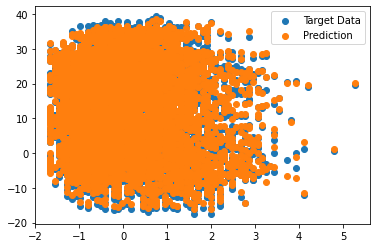

In [20]:
# plot relative to wind speed [:,2]
W , y_pred_train , y_pred_valid , RMSE_train , RMSE_valid = direct_sol_reg(X_train_sc_arr,y_train_arr,X_val_sc_arr,y_val_arr,1)

### **3.2) M2: Full Batch Gradient Descent**

 $$w_t = w_{t-1} - \alpha~g_t$$ 
 
*** $\alpha$ = learning rate    

*** $g_t$ = gradient computed on the entire data. 

**3.2.1) Initialize weights**  
**3.2.2) Compute output based on weights**  
**3.2.3) Compute error**  
**3.2.4) Compute gradients**  
**3.2.5) Update the weights**  
**3.2.6) Repeat steps 2->5 until the error is acceptable** 
- learning rate $\alpha= 0.01$ is fixed 
- until model's VALIDATION RMSE converges
  - converged when RMSE of **gradient descent** on the validation set...

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  !!! $RMSE_\text{Direct Solution}$ = RMSE of **direct solution** on the validation 

  !!! $RMSE_\text{Direct Solution}\times 1.001$ = convergence threshold (CT).

epoch: 1859
X_train: (6132, 8), X_val: (1314, 8)
w: (1, 8)
y_train: (6132, 1), y_val: (1314, 1) 
t_train_actual: (6132, 1), y_val_actual: (1314, 1)
gradient: (1, 8) 


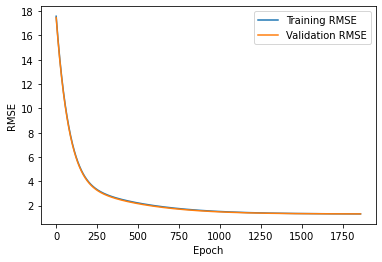

--- Total Training Time: 3.7286033630371094 (s) ---


In [21]:
import time
# record current time
start_time = time.time() 

# steps:
# 3.2.1) initialize weights
# 3.2.2) compute output based on weights
# 3.2.3) compute error
# 3.2.4) compute gradients
# 3.2.5) update the weights
# 3.2.6) repeat steps 2->5 until the error is acceptable

# 3.2.1) initial weights with small random numbers (<0.001) 
# training data: shape of (1,8)
w = ( np.random.random(X_train_sc_arr.shape[1]) /100000).reshape(1,-1) 

# fixed learning rate of 0.01
rate = 0.01 

# empty array to store training and validation RMSE values
rmse_train = []  
rmse_val = []   

for epoch in range(0,5000):           # update the weight numerous times
  # Training Data:

  # 3.2.2) compute output based on weights
  y = np.dot(X_train_sc_arr,w.T)      # to get predicted target values: (6132,1) = (6132, 8) X (8,1)

  # 3.2.3) compute error
  rmse_train.append(rmse(y,y_train_arr))
  y_t = y - y_train_arr               # predicted - actual target values: (6132,1) = (6132,1) - (6132,1) 

  # 3.2.4) compute gradient or "partial derivative":
  gradient = ( (1/len(X_train_sc_arr)) * np.dot(X_train_sc_arr.T,y_t) ).reshape(1,-1)  # reshape column vector (8,1) to row vector (1,8)

  # 3.2.5) update the weights
  w = w - rate*gradient               # update the weight ('slope')


  # Validation Data: USE THE GRADIENT AND WEIGHT MODEL FROM TRAINING DATA!!!

  # 3.2.2) compute output based on weights
  y2 = np.dot(X_val_sc_arr,w.T)

  # 3.2.3) compute error
  rmse_val.append(rmse(y2,y_val_arr))

  # 3.2.6) repeat steps 3.2.2->3.2.5 until the error is acceptable
  if rmse_val[epoch] <= 1.001*RMSE_valid:    # for validation data: if RMSEgradientmethod <= RMSEdirectmethod then we converge
    print("epoch:", epoch)
    break                                    # break loop if VALIDATION RMSE converges


# shape of matrix dataset
print (f"X_train: {X_train_sc_arr.shape}, X_val: {X_val_sc_arr.shape}")    
# shape of weight vector (Model using TRAINING DATA ONLY)
print (f"w: {w.shape}")                 
# shape of predicted target values
print (f"y_train: {y.shape}, y_val: {y2.shape} ")                 
# shape of actual target values
print (f"t_train_actual: {y_train_arr.shape}, y_val_actual: {y_val_arr.shape}")       
# shape of gradient vector (Model using TRAINING DATA ONLY)
print (f"gradient: {gradient.shape} ")

# plot on one figure 
# training RMSE vs. epoch & validation RMSE vs. epoch
plt.plot(rmse_train,label = 'Training RMSE') 
plt.plot(rmse_val,label = 'Validation RMSE')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
# plt.xlim((250,500)) # to zoom in
# plt.ylim((2,4))     # to zoom in
plt.legend()
plt.show()

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

In [22]:
# rmse_val[-1]
RMSE_valid * 1.001

1.3236768644292891

**After zooming in on the RMSE graph above, the training RMSE (blue line) seems to be lower than the validation RMSE (orange line) after approximately 250 Epoch. A lower RMSE indicates a model with higher accuracy. Since this model results in higher accuracy (lower RMSE) for the training data compared to validation data, this model seems to be overfitting and not generalizing to new unseen data.**

**Since both the training data and validation data have high RMSE (low accuracy) at the beginning of the epoch, the model is underfitting for the first few epochs. However, the larger training accuracy (lower RMSE) compared to validation accuracy after converging could indicate that full-batch gradient descent (or batch-sizes too large) might lead to poor generalization and overfitting.**

### **3.3) M2: Mini Batch & Stochastic Gradient Descent**

**3.3.1) Select mini batch size and learning rate and convergence threshold**  
**3.3.2) Initialize weights**  
**3.3.3) Create mini-batches**  

Iterate **3.3.4)-3.3.6)** for each mini-batch until whole **TRAINING** dataset is used (epoch) 

- Using **TRAINING** Data:   
- **3.3.4) Compute output y based on weights**  
- **3.3.5) Compute gradients**  
- **3.3.6) Update the weights for next mini-batch**  

Iterate **3.3.4)** for entire **VALIDATION** dataset after each epoch using final weights from above  

- Using **VALIDATION** Data:   
- **3.3.4) Compute output y based on weights**  


**3.3.7) Compute training and validation RMSE at each epoch**  
- GD might not converge to a solution for certain batch sizes (RMSE might increase after each epoch).  

**3.3.8) After each epoch, shuffle entire training set**  
- ensures new mini-batches selected for each epoch
- `np.random.permutation` 
  



### **Create Function 3.3.1)~3.3.8)**
- Mini-Batch Gradient Descent until Convergence Threshold
- Input Data: 
   - Training/Validation data
   - Batch size
   - Learning rate
   - Convergence Threshold (CT)
- Return Arrays:
   - Final weights (after training)
   - Training RMSE (each epoch)
   - Validation RMSE (each epoch)
   - Array of elapsed time 
    - Start of training process to end of each epoch 
    - e.g., if each epoch takes exactly 3 seconds: [3 6 9 ...]

### **Use Function to Investigate Effect of Batch Size on Convergence**
- Stochastic Gradient Descent
 - Batch Size = 1
- Mini Batch Gradient Descent
 - 1 < Batch Size < # Training Data 
- Full Batch Gradient Descent
 - Batch Size  = # training data


### **3 Plots**
  1.  Plot 1: for all the **converging** batch sizes
    - x-axis = Epoch #  
    - y-axis = Training & Validation RMSE
  2. Plot 2: for all the **converging** batch sizes
    - x-axis = Time
    - y-axis = Training & Validation RMSE
  3. Plot 3:
    - x-axis = Batch Size  
    - y-axis = Total Training Time (y-axis) 


In [23]:
# steps:
# 3.3.1) select mini batch size and learning rate and convergence threshold
# 3.3.2) initialize weights
# 3.3.3) create mini-batches

# iterate steps 3.3.4)-3.3.6) for each mini-batch until whole TRAINING dataset is used (epoch)
# USING TRAINING DATA:
# 3.3.4) compute output y based on weights
# 3.3.5) compute gradients
# 3.3.6) update the weights for next mini-batch

# iterate step 3.3.4) for entire validation dataset after each epoch using final weights from above
# USING VALIDATION DATA:
# 3.3.4) compute output y based on weights

# 3.3.7) compute training and validation RMSE at each epoch
# 3.3.8) after each epoch, shuffle entire training set

**3.3.1) Select mini batch size and learning rate and convergence threshold**  

In [24]:
# 3.3.1) select mini batch size and learning rate and convergence threshold
batch_size = 256
rate = 0.01

# 1.001 * Validation RMSE using direct solution
CT = 1.001*RMSE_valid   

**3.3.2) Initialize weights**  

In [25]:
# 3.3.2) initial weights with small random numbers (<0.001) 
# training data: shape of (1,8)
w = ( (np.random.random(X_train_sc_arr.shape[1])) /100000).reshape(1,-1) 

**3.3.3) Create mini-batches**  

In [26]:
# 3.3.3) function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []                             # empty list for mini-batch features and targets
    data = np.hstack((X, y))                      # combine target with corresponding feature matrix
    shuffled = np.random.permutation(data)        # shuffle the entire dataset AFTER EACH EPOCH
    n_minibatches = data.shape[0] // batch_size   # number of mini-batches = # samples / batch size
    i = 0
  
    for i in range(n_minibatches + 1):                                # +1 since python doesn't reach the last index
        mini_batch = shuffled[i * batch_size:(i + 1)*batch_size, :]   # create mini-batches from shuffled data
        X_mini = mini_batch[:, :-1]                                   # isolate the FEATURES from mini-batch: shape (4,8)
        Y_mini = mini_batch[:, -1].reshape((-1, 1))                   # isolate the TARGETS from mini-batch: shape (4,1)
        mini_batches.append((X_mini, Y_mini))                         # add to mini_batches list as (features,targets)

    if data.shape[0] % batch_size != 0:                               # if batch size does NOT equally divide the data
        mini_batch = shuffled[i * batch_size:data.shape[0]]           # create "remaining mini-batch" from remaining data
        X_mini = mini_batch[:, :-1]                                   # isolate the FEATURES from "remaining mini-batch": shape (4,41)
        Y_mini = mini_batch[:, -1].reshape((-1, 1))                   # isolate the TARGETS from "remaining mini-batch": shape (4,1)
        mini_batches.append((X_mini, Y_mini))                         # add to mini_batches list as (features,targets)
        
    # return the batches of (features,targets) as a LIST
    return mini_batches    

Iterate **3.3.4)-3.3.6)** for each mini-batch until whole **TRAINING** dataset is used (epoch) 

- Using **TRAINING** Data:   
- **3.3.4) Compute output y based on weights**  
- **3.3.5) Compute gradients**  
- **3.3.6) Update the weights for next mini-batch**  

Iterate **3.3.4)** for entire **VALIDATION** dataset after each epoch using final weights from above  

- Using **VALIDATION** Data:   
- **3.3.4) Compute output y based on weights**  


**3.3.7) compute training and validation RMSE at each epoch**  
**3.3.8) after each epoch, shuffle entire training set**  

In [27]:
# iterate steps 3.3.4)~3.3.6) for each mini-batch until whole dataset is used (epoch)
import time
# to calculate start of training process to end of each epoch
epoch_time = [0]                

# number of epochs
max_iters = 300                 

# empty array to store RMSE values after each epoch
rmse_train = []                 
rmse_val = []
epoch_list = []

# continue # epoch times
for epoch in range(max_iters):  
  # record current time
  start_time = time.time()     
  # store training data predictions 
  y_train_pred = []            
  y_train_actual = []

  # 3.3.3) create mini-batches
  # SHUFFLE and create mini-batches of TRAINING DATA
  mini_batches = create_mini_batches(X_train_sc_arr, y_train_arr, batch_size) 

  # USING TRAINING DATA:
  # skip last mini-batch at index -1 since it is empty!
  for mini_batch in mini_batches[0:-1]:   
      # features,targets from mini-batch
      X_mini, y_mini = mini_batch         
      # 3.3.4) compute output y based on weights:(batch size, 1) = (batch size, 8) X (8, 1)
      # TRAINING DATA predictions
      y = np.dot(X_mini,w.T)              
      # 3.3.5) compute gradients
      # reshape column vector (8,1) to row vector (1,8)
      gradient = ( (1/len(X_mini)) * np.dot(X_mini.T,y - y_mini) ).reshape(1,-1)  
      # 3.3.6) update the weights ('slope') for next mini-batch
      w = w - rate*gradient      

      # create separate list of predictions and actual targets to compare RMSE at end of epoch
      for val in y: 
        # training predictions list
        y_train_pred.append(val)     
      for val in y_mini:
        # training actual list
        y_train_actual.append(val)   

  # record current time
  end_time = time.time() 
  # to calculate start of training process to end of each epoch
  epoch_time.append(end_time - start_time + epoch_time[epoch])  

  # keep track of number of epochs
  epoch_list.append(epoch+1) 

  # iterate step 4 for entire validation dataset after each epoch using final weights from above  
  # USING VALIDATION DATA:
  # 3.3.4) compute output y based on weights
  # VALIDATAION DATA predictions
  y_val_pred = np.dot(X_val_sc_arr,w.T)           

  # 3.3.7) compute training and validation RMSE after EACH EPOCH 
  # print(len(y_train_pred),len(y_train_actual))
  rmse_train.append(rmse(np.array(y_train_pred),np.array(y_train_actual)))    
  rmse_val.append(rmse(np.array(y_val_pred),np.array(y_val_arr)))             
  
  # 3.3.8) after each epoch, shuffle entire training set   --> check 3.3.3)

  # break loop if DIVERGENCE occurs
  if rmse_train[epoch] > 5 + rmse_train[epoch-1] or rmse_val[epoch] > 5 + rmse_val[epoch-1]:
    print('The RMSE values are DIVERGING due to small batch size!')
    break

  # break loop if convergence threshold is reached
  if rmse_val[epoch] <= CT:
    print(f'convergence after {epoch+1} epochs at convergence threshold: {CT}')
    break

# function will return the following arrays:
print(f'final weights after training: {w}')                
print(f'training RMSE at each epoch:{rmse_train}')  
print(f'validation RMSE at each epoch:{rmse_val}')

# remove the 0 placeholder from elapsed time
epoch_time.remove(0)   
print(f'elapsed time from start of training to end of each epoch in seconds: {epoch_time}')
print(w.shape[1],len(rmse_train),len(rmse_val),len(epoch_time))

convergence after 78 epochs at convergence threshold: 1.3236768644292891
final weights after training: [[ 1.28521445e+01 -4.97502712e+00  3.68906274e-02  4.01117741e-02
   1.34691439e+01  6.82187586e-01  1.37757612e-01  5.93027232e-03]]
training RMSE at each epoch:[15.726179907092899, 12.42931866859328, 9.94916145860286, 8.084984782195509, 6.6886723275685585, 5.648072309493511, 4.876189752622387, 4.30341825738252, 3.877314665489387, 3.556568920430031, 3.310256658681869, 3.1166795492999784, 2.9597290049473077, 2.828899368784284, 2.7165021606197994, 2.6178429705795865, 2.5295217882611785, 2.4491799986331046, 2.3752100030762735, 2.3066394012021703, 2.2428607844647996, 2.183050888217241, 2.12698331829109, 2.0743386197910505, 2.0246788082505436, 1.9780423755957326, 1.9340963069194554, 1.8927952033876976, 1.8539266982288143, 1.817368196462108, 1.7830045310851648, 1.7507788796604846, 1.7204900402332914, 1.6921340283236688, 1.6654803431747616, 1.6405977054329555, 1.6172754121669815, 1.59548047

**Create Function 3.3.1)~3.3.8)**

In [28]:
def minibatchGD(X_train, y_train, X_val, y_val, batch_size, rate, CT): 
  # 3.3.1) select mini batch size and learning rate and convergence threshold
  # 3.3.2) initial weights with small random numbers (<0.001) 
  # training data: shape of (1,8)
  w = ( (np.random.random(X_train_sc_arr.shape[1])) /100000).reshape(1,-1) 
  
  # iterate steps 3.3.4)~3.3.6) for each mini-batch until whole dataset is used (epoch)
  import time
  # to calculate start of training process to end of each epoch
  epoch_time = [0]        

  # number of epochs
  max_iters = 800  
  # empty array to store training RMSE values after each epoch   
  rmse_train = []  
  rmse_val = []
  epoch_list = []

  # continue # epoch times
  for epoch in range(max_iters):     
    # records current time at start of epoch
    start_time = time.time() 
    # store training data predictions
    y_train_pred = []        
    y_train_actual = []

    # 3.3.3) create mini-batches 
    # SHUFFLE and create mini-batches of TRAINING DATA
    mini_batches = create_mini_batches(X_train, y_train, batch_size) 

    # USING TRAINING DATA:
    # skip last mini-batch at index -1 since it is empty!
    for mini_batch in mini_batches[0:-1]:   
        # features,targets from mini-batch
        X_mini, y_mini = mini_batch         
        # 3.3.4) compute output y based on weights:(batch size,1) = (batch size, 41) X (41,1)
        # TRAINING DATA predictions
        y = np.dot(X_mini,w.T)           
        # 3.3.5) compute gradients
        # reshape column vector (8,1) to row vector (1,8)
        gradient = ( (1/len(X_mini)) * np.dot(X_mini.T,y - y_mini) ).reshape(1,-1)  
        # 3.3.6) update the weights ('slope') for next mini-batch
        w = w - rate*gradient     

        # create separate list of predictions and actual targets to compare RMSE at end of epoch
        for val in y: 
          # training predictions list
          y_train_pred.append(val)     
        for val in y_mini:
          # training actual list
          y_train_actual.append(val) 

    # record current time at end of epoch
    end_time = time.time()     
    # to calculate start of training process to end of each epoch 
    elapsed = end_time - start_time  
    # how many seconds elapsed
    epoch_time.append(elapsed + epoch_time[epoch])

    # keep track of number of epochs
    epoch_list.append(epoch+1) 

    # iterate step 4 for entire validation dataset after each epoch using final weights from above  
    # USING VALIDATION DATA:
    # 3.3.4) compute output y based on weights
    # VALIDATAION DATA predictions
    y_val_pred = np.dot(X_val,w.T)          

    # 3.3.7) compute training and validation RMSE after EACH EPOCH 
    # print(len(y_train_pred),len(y_train_actual))
    rmse_train.append(rmse(np.array(y_train_pred),np.array(y_train_actual)))    
    rmse_val.append(rmse(np.array(y_val_pred),np.array(y_val)))             
    
    # 3.3.8) after each epoch, shuffle entire training set   --> check 3)
    
    # break loop if DIVERGENCE occurs
    if rmse_train[epoch] > 5 + rmse_train[epoch-1] or rmse_val[epoch] > 5 + rmse_val[epoch-1]:
      print('The RMSE values are DIVERGING due to small batch size!')
      break

    # break loop if convergence threshold is reached
    if rmse_val[epoch] <= CT:
      print(f'convergence after {epoch+1} epochs at convergence threshold: {CT}')
      break

  # remove the 0 placeholder from elapsed time
  epoch_time.remove(0)   

  # function will return the following arrays:
  return w, np.array(rmse_train), np.array(rmse_val), np.array(epoch_time), np.array(epoch_list)

**Use Function to Investigate Effect of Batch Size on Convergence**

In [29]:
# Full-Batch Gradient Descent: batch size = # of training data
w, rmse_train, rmse_val, epoch_time, epoch_list = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=len(X_train_sc_arr), rate=0.01, CT=1.001*RMSE_valid)

In [30]:
# Stochastic Gradient Descent: batch size = 1
w, rmse_train, rmse_val, epoch_time, epoch_list = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=1, rate=0.01, CT=1.001*RMSE_valid)

convergence after 3 epochs at convergence threshold: 1.3236768644292891


In [31]:
# Mini-Batch Gradient Descent: batch size = some of training data
w, rmse_train, rmse_val, epoch_time, epoch_list = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=8, rate=0.01, CT=1.001*RMSE_valid)

convergence after 3 epochs at convergence threshold: 1.3236768644292891


In [32]:
# Mini-Batch Size: 2^7 = 128
w_1, rmse_train_1, rmse_val_1, epoch_time_1, epoch_list_1 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=128, rate=0.01, CT=1.001*RMSE_valid)

convergence after 39 epochs at convergence threshold: 1.3236768644292891


In [33]:
# Mini-Batch Size: 2^8 = 256
w_2, rmse_train_2, rmse_val_2, epoch_time_2, epoch_list_2 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=256, rate=0.01, CT=1.001*RMSE_valid)

convergence after 78 epochs at convergence threshold: 1.3236768644292891


In [34]:
# Mini-Batch Size: 2^9 = 512
w_3, rmse_train_3, rmse_val_3, epoch_time_3, epoch_list_3 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=512, rate=0.01, CT=1.001*RMSE_valid)

convergence after 155 epochs at convergence threshold: 1.3236768644292891


In [35]:
# Mini-Batch Size: 2^10 = 1024
w_4, rmse_train_4, rmse_val_4, epoch_time_4, epoch_list_4 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=1024, rate=0.01, CT=1.001*RMSE_valid)

convergence after 311 epochs at convergence threshold: 1.3236768644292891


In [36]:
# Mini-Batch Size: 2^11 = 2048
w_5, rmse_train_5, rmse_val_5, epoch_time_5, epoch_list_5 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=2048, rate=0.01, CT=1.001*RMSE_valid) 

convergence after 620 epochs at convergence threshold: 1.3236768644292891


**3 Plots**

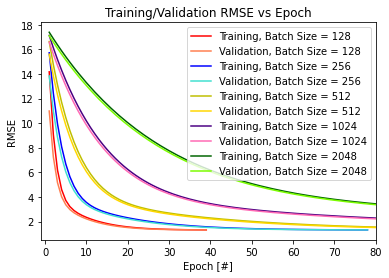

In [37]:
# Plot 1) Training/Validation RMSE vs Epoch for all 5 converging batch sizes
plt.plot(epoch_list_1, rmse_train_1, 'r', label = 'Training, Batch Size = 128') 
plt.plot(epoch_list_1, rmse_val_1, 'coral', label = 'Validation, Batch Size = 128')
plt.plot(epoch_list_2, rmse_train_2, 'blue', label = 'Training, Batch Size = 256') 
plt.plot(epoch_list_2, rmse_val_2, 'turquoise', label = 'Validation, Batch Size = 256')
plt.plot(epoch_list_3, rmse_train_3, 'y', label = 'Training, Batch Size = 512') 
plt.plot(epoch_list_3, rmse_val_3, 'gold', label = 'Validation, Batch Size = 512')
plt.plot(epoch_list_4, rmse_train_4, 'indigo', label = 'Training, Batch Size = 1024') 
plt.plot(epoch_list_4, rmse_val_4, 'hotpink', label = 'Validation, Batch Size = 1024')
plt.plot(epoch_list_5, rmse_train_5, 'darkgreen', label = 'Training, Batch Size = 2048') 
plt.plot(epoch_list_5, rmse_val_5, 'lawngreen', label = 'Validation, Batch Size = 2048')
plt.title('Training/Validation RMSE vs Epoch')
plt.xlabel("Epoch [#]")
plt.ylabel("RMSE")
# x-axis limit to ZOOM in on the curves
plt.xlim((-1,80))   
plt.legend()
plt.show()

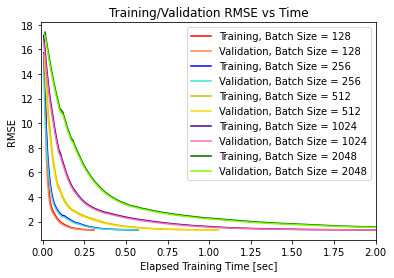

In [38]:
# Plot 2) Training/Validation RMSE vs Time for all 5 converging batch sizes
plt.plot(epoch_time_1, rmse_train_1, 'r', label = 'Training, Batch Size = 128') 
plt.plot(epoch_time_1, rmse_val_1, 'coral', label = 'Validation, Batch Size = 128')
plt.plot(epoch_time_2, rmse_train_2, 'blue', label = 'Training, Batch Size = 256') 
plt.plot(epoch_time_2, rmse_val_2, 'turquoise', label = 'Validation, Batch Size = 256')
plt.plot(epoch_time_3, rmse_train_3, 'y', label = 'Training, Batch Size = 512') 
plt.plot(epoch_time_3, rmse_val_3, 'gold', label = 'Validation, Batch Size = 512')
plt.plot(epoch_time_4, rmse_train_4, 'indigo', label = 'Training, Batch Size = 1024') 
plt.plot(epoch_time_4, rmse_val_4, 'hotpink', label = 'Validation, Batch Size = 1024')
plt.plot(epoch_time_5, rmse_train_5, 'darkgreen', label = 'Training, Batch Size = 2048') 
plt.plot(epoch_time_5, rmse_val_5, 'lawngreen', label = 'Validation, Batch Size = 2048')
plt.title('Training/Validation RMSE vs Time')
plt.xlabel("Elapsed Training Time [sec]")
plt.ylabel("RMSE")
# x-axis limit to ZOOM in on the curves
plt.xlim((-0.01,2))   
plt.legend()
plt.show()

Text(0, 0.5, 'Total Train Time [sec]')

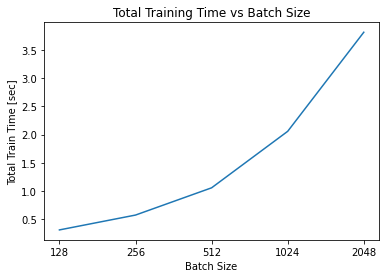

In [39]:
# Plot 3) Total Training Time vs Batch Size
total_train_time = [epoch_time_1[-1],epoch_time_2[-1],epoch_time_3[-1],epoch_time_4[-1],epoch_time_5[-1]] 
batch_sz = ['128','256','512','1024','2048']
plt.plot(batch_sz,total_train_time)
plt.title('Total Training Time vs Batch Size')
plt.xlabel("Batch Size")
plt.ylabel("Total Train Time [sec]")

- *Batch Size with **Diverging** RMSE:*

**With an extremely small batch size (~2), the RMSE values for the training and validation data could potentially diverge after each epoch. There is a risk of divergence until a larger batch size ~ 128 is used, in which case the model converges with the convergence threshold after approximately 39 epochs. The reason that extremely small batch sizes could potentially diverge is that the dataset is large, and with smaller batch sizes there is an increase in noise and thus the model might diverge to a different local minimum or fail to converge.** 

**Using a small batch size is computationally less expensive and converges quicker compared to full-batch gradient descent. However, due to the divergence, the model could take longer to run for EXTREMELY small batch sizes. For example, using the stochastic gradient descent with batch size = 1 takes longer because the model learns at every data point (rows) and over a larger range of epochs, the prediction values could diverge too much from the actual target values, resulting in extremely large RMSE values that even float64 can't handle. This might result in the error:** *Input contains NaN, infinity or a value too large for dtype('float64')* **for extremely smaller batch sizes! Thus, break loop if divergence occurs by comparing current RMSE values to previous RMSE values after each epoch!**

 - *Batch Size with **Converging** RMSE:*

**From the plot on Training/Validation RMSE vs Epoch for all 5 converging batch sizes, it is apparent that larger batch sizes begin with a larger training/validation RMSE and take more epochs to converge to a small RMSE value. This confirms the hypothesis that smaller batch sizes are less computationally expensive and converges quicker (unless it diverges) compared to larger batch sizes, as it learns quicker using smaller subset of data (more noise using smaller batch size). This is also true in the plot on Training/Validation RMSE vs Time, where the larger batch sizes take longer time to converge. From the final plot on Total Training Time vs Batch Size, it solidifies the findings that increasing the batch size increases the total time it takes for convergence, and thus takes more training epochs to converge.**

**Using the mini-batch doesn't guarantee finding the global minimum, whereas the global minimum of the RMSE loss function can be found using the full-batch. However, the mini-batch gradient converges quicker to an acceptable/good local minimum, as the model is able to start learning quicker using the smaller batches. Thus, it is better to start with smaller batch sizes for quicker convergence computations and then slowly increase the batch size to bring it closer to global minimum.**

## **4) Gradient Descent Learning Rate**

- the effect of learning rate on convergence

**4.1) Smaller Batch Sizes and Learning Rate**
- Smaller learning rate for smaller batch sizes CONVERGES
- Larger learning rate for smaller batch sizes DIVERGES

**4.2) Two plots using optimal batch size of 8 (fastest convergence time) to test 10 different learning rates**
  1. Plot 1: for all the learning rates
    - x-axis: **epoch** 
    - y-axis: Training & Validation RMSE
  2. Plot 2: for all the learning rates
    - x-axis: **time** 
    - y-axis: Training & Validation RMSE


**Notice Larger learning rate for smaller batch sizes DIVERGES**

In [40]:
# Mini-Batch Size: 8
learning_rate_8 = []

# NOTICE LARGER LEARNING RATE FOR SMALLER BATCH SIZE DIVERGES
for rate in np.arange(0.05,0.2,0.05): 
  w_8, rmse_train_8, rmse_val_8, epoch_time_8, epoch_list_8 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=8, rate=rate, CT=1.001*RMSE_valid)
  # if RMSE validation converges, record the current learning rate
  print(rate)
  if rmse_val_8[-1] <= CT:            
    learning_rate_8.append(rate)   

convergence after 33 epochs at convergence threshold: 1.3236768644292891
0.05
The RMSE values are DIVERGING due to small batch size!
0.1
The RMSE values are DIVERGING due to small batch size!
0.15000000000000002
The RMSE values are DIVERGING due to small batch size!
0.2


**4.1) Small Mini-Batch Sizes: 8, 16, 32**

In [41]:
batch_s = [8,16,32]

In [42]:
# Mini-Batch Size: 8
learning_rate_8 = []

# use SMALLER learning rate for smaller batch size to converge (helps smaller batch size to adapt after each weight change)!
for rate in np.arange(0.2,0,-0.01): 
  w_8, rmse_train_8, rmse_val_8, epoch_time_8, epoch_list_8 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=8, rate=rate, CT=1.001*RMSE_valid)
  # if RMSE validation converges, record the current learning rate
  if rmse_val_8[-1] <= CT:            
    learning_rate_8.append(rate)    

The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
convergence after 101 epochs at convergence threshold: 1.3236768644292891
convergence after 16 epochs at convergence threshold: 1.3236768644292891
convergence after 4 epochs at convergence threshold: 1.3236768644292891
The RMSE values are DIVERGING due to small batch size!
convergence after 27 epochs at convergence threshold: 1.3236768644292891
convergence after 9 epochs at convergence threshold: 1.3236768644292891
convergence after 32 epochs at convergence threshold: 1.3236768644292891
convergence a

In [43]:
# Mini-Batch Size: 16

learning_rate_16 = []
for rate in np.arange(0.2,0,-0.01):   
  w_16, rmse_train_16, rmse_val_16, epoch_time_16, epoch_list_16 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=16, rate=rate, CT=1.001*RMSE_valid)
  # if RMSE validation converges, record the current learning rate
  if rmse_val_16[-1] <= CT:            
    learning_rate_16.append(rate)    

The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
convergence after 118 epochs at convergence threshold: 1.3236768644292891
convergence after 41 epochs at convergence threshold: 1.3236768644292891
convergence after 32 epochs at convergence threshold: 1.3236768644292891
convergence after 25 epochs at convergence threshold: 1.3236768644292891
convergence after 19 epochs at convergence threshold: 1.3236768644292891
convergence after 7 epochs at convergence threshold: 1.3236768644292891
convergence after 50 epochs at convergence threshold: 1.3236768644292891
convergence after 60 epochs at convergence threshold: 1.3236768644292891
convergence after 10 epochs at convergence threshold: 1.3236768644292891
convergence after 3 epochs at convergence threshold: 1.3236768644292891
convergence after 11 epochs at convergence threshold: 1.3236768644292891
convergence after 5 epochs at con

In [44]:
# Mini-Batch Size: 32

learning_rate_32 = []
for rate in np.arange(0.5,0.3,-0.01): 
  w_32, rmse_train_32, rmse_val_32, epoch_time_32, epoch_list_32 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=32, rate=rate, CT=1.001*RMSE_valid)
  # if RMSE validation converges, record the current learning rate
  if rmse_val_32[-1] <= CT:           
    learning_rate_32.append(rate)    

The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
convergence after 22 epochs at convergence threshold: 1.3236768644292891
convergence after 26 epochs at convergence threshold: 1.3236768644292891
convergence after 29 epochs at convergence threshold: 1.3236768644292891
The RMSE values are DIVERGING due to small batch size!
The RMSE values are DIVERGING due to small batch size!
convergence after 45 epochs at convergence threshold: 1.3236768644

In [45]:
df = pd.DataFrame()   #create empty dataframe
df['Batch Size'] = batch_s
df['Convergence Learning Rate'] = [learning_rate_8[1],learning_rate_16[1],learning_rate_32[1]]   #select second learning rate after convergence
df['Training RMSE Start'] = [rmse_train_8[0],rmse_train_16[0],rmse_train_32[0]]
df['Training RMSE Converged'] = [rmse_train_8[-1],rmse_train_16[-1],rmse_train_32[-1]]
df['Validation RMSE Start'] = [rmse_val_8[0],rmse_val_16[0],rmse_val_32[0]]
df['Validation RMSE Converged'] = [rmse_val_8[-1],rmse_val_16[-1],rmse_val_32[-1]]

In [46]:
df

,Batch Size,Convergence Learning Rate,Training RMSE Start,Training RMSE Converged,Validation RMSE Start,Validation RMSE Converged
0,8,0.10,5.124161,1.327881,1.673329,1.320579
1,16,0.16,6.922638,1.333668,2.518269,1.321721
2,32,0.39,2.503161,1.406662,1.350218,1.320058


**The three selected batch sizes that do not converge with a larger learning rate of 0.2 are: 8, 16 and 32.**

**From the results in the table above, the smallest batch size of 8 converges when the learning rate reaches approximately 0.10 or smaller values. On the other hand, larger batch sizes of 16 and 32 converges at a learning rate of approximately 0.16 and 0.39 (or smaller values), respectively. From these results, it is apparent that smaller batch sizes converge with smaller learning rates compared to larger batch sizes that successfully converge with larger learning rates.** 

**Small batch sizes in mini-batch gradient descent produce a lot of noise when converging, and since a larger learning rate overshoots the gradient descent at each epoch, it could diverge to a sub-optimal local minimum or fail to converge. Thus, a smaller learning rate reduces the effect of the weight parameteres at each epoch for smaller batch sizes, and avoids overshooting/diverging to a different local minimum. However, it is important to note that smaller learning rates take longer to converge, and thus the learning rate should be increased for larger batch sizes to speed up the convergence process.** 

**From the table results above, both the training and validation RMSE values seems to start at smaller values for smaller batch sizes, but all three batch sizes converge to the same local(or global) minimum. The validation data is more accurate (smaller RMSE) compared to training data for all three batch sizes, which indicates that the model is able generalize on unseen data and avoids overfitting. The lower initial Validation RMSE values for smaller batch sizes (thus higher accuracy) compared to larger batch sizes could be explained by the larger noise with smaller batch sizes, which offers a regularizing effect (regularizes/shrinks weight parameters/coefficients to discourage complex model to avoid overfitting).**

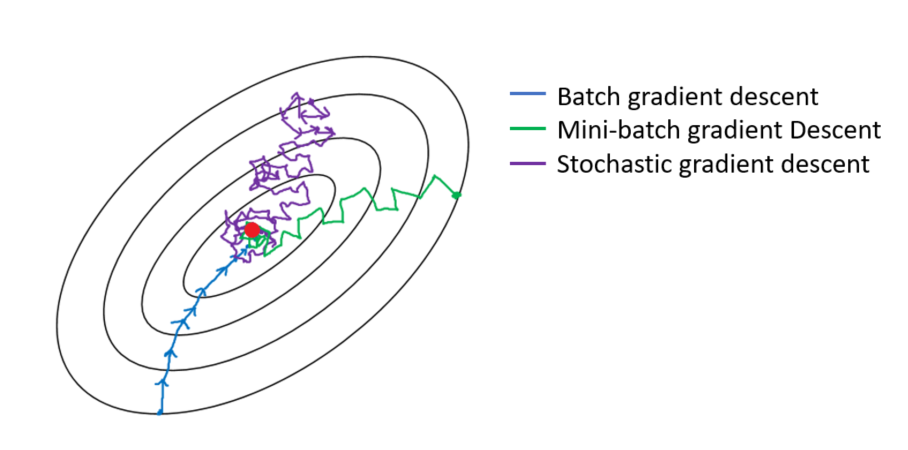



```
Image from: https://medium.com/analytics-vidhya/gradient-descent-vs-stochastic-gd-vs-mini-batch-sgd-fbd3a2cb4ba4
```



**4.2) Two plots using optimal batch size of 128 (fastest convergence time) to test 10 different learning rates**

In [55]:
learning_rate_128 = []
rmse_train_list = []
rmse_val_list = []
epoch_list = []
time_list = []

# 10 learning rates that converge!
for rate in np.arange(0.005,0.016,0.001):   
  w_128, rmse_train_128, rmse_val_128, epoch_time_128, epoch_list_128 = minibatchGD(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, batch_size=128, rate=rate, CT=1.001*RMSE_valid)
  
  # record the current learning rate if RMSE validation converges
  if rmse_val_128[-1] <= CT:          
    learning_rate_128.append(rate)  
    # at each learning rate, record:
    rmse_train_list.append(rmse_train_128)  # training RMSE
    rmse_val_list.append(rmse_val_128)      # validation RMSE
    epoch_list.append(epoch_list_128)       # number of epochs
    time_list.append(epoch_time_128)        # training time (epoch time)

convergence after 78 epochs at convergence threshold: 1.3236768644292891
convergence after 65 epochs at convergence threshold: 1.3236768644292891
convergence after 56 epochs at convergence threshold: 1.3236768644292891
convergence after 49 epochs at convergence threshold: 1.3236768644292891
convergence after 44 epochs at convergence threshold: 1.3236768644292891
convergence after 39 epochs at convergence threshold: 1.3236768644292891
convergence after 36 epochs at convergence threshold: 1.3236768644292891
convergence after 32 epochs at convergence threshold: 1.3236768644292891
convergence after 30 epochs at convergence threshold: 1.3236768644292891
convergence after 28 epochs at convergence threshold: 1.3236768644292891
convergence after 27 epochs at convergence threshold: 1.3236768644292891


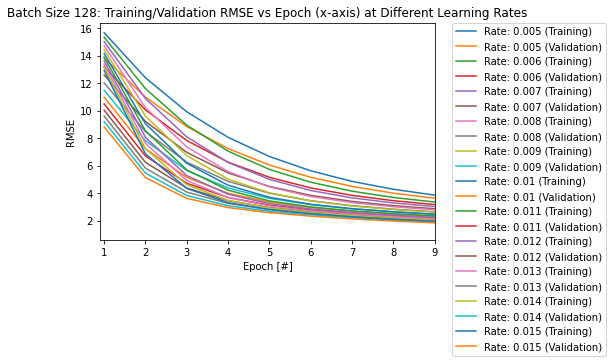

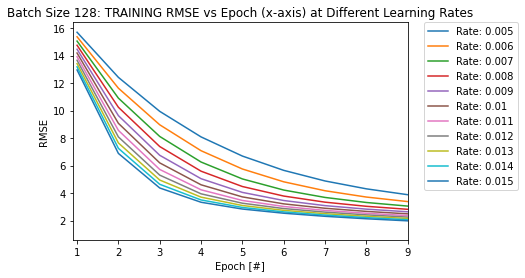

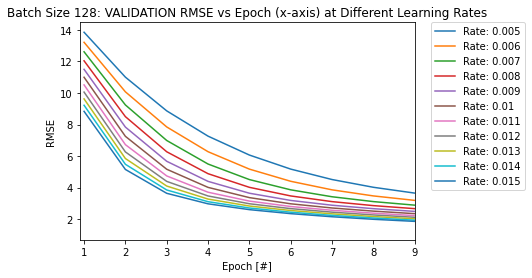

In [56]:
# plot: Training/Validation RMSE vs Epoch (x-axis) for all learning rates

# both Training and Validation RMSE:
plt.figure()
for i in range(len(learning_rate_128)):   
  plt.plot(epoch_list[i], rmse_train_list[i], label = f'Rate: {round(learning_rate_128[i],3)} (Training)')
  plt.plot(epoch_list[i], rmse_val_list[i], label = f'Rate: {round(learning_rate_128[i],3)} (Validation)')
  plt.xlabel('Epoch [#]')
  plt.ylabel('RMSE')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
# ZOOM in on graph!
plt.xlim((0.9,9)) 
plt.title('Batch Size 128: Training/Validation RMSE vs Epoch (x-axis) at Different Learning Rates')
plt.show()

# compare Training RMSE:
plt.figure()
for i in range(len(learning_rate_128)):   
  plt.plot(epoch_list[i], rmse_train_list[i], label = f'Rate: {round(learning_rate_128[i],3)}')
  plt.xlabel('Epoch [#]')
  plt.ylabel('RMSE')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim((0.9,9)) 
plt.title('Batch Size 128: TRAINING RMSE vs Epoch (x-axis) at Different Learning Rates')
plt.show()

# compare Validation RMSE:
plt.figure()
for i in range(len(learning_rate_128)):   
  plt.plot(epoch_list[i], rmse_val_list[i], label = f'Rate: {round(learning_rate_128[i],3)}')
  plt.xlabel('Epoch [#]')
  plt.ylabel('RMSE')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim((0.9,9)) 
plt.title('Batch Size 128: VALIDATION RMSE vs Epoch (x-axis) at Different Learning Rates')
plt.show()

**From the first plot of RMSE vs Epoch above, it seems that the model overfits after a certain amount of epochs, as the validation RMSE values seem to converge to higher values (slightly lower accuracy) compared to the training RMSE values for each learning rate.**

**Also note that it takes longer to converge with smaller learning rates as seen in the other two plots above. A larger learning rate converges quicker to a local/global minimum as it takes a larger step size at each epoch.**

**This can be seen more clearly in the two plots below, as the model takes longer to converge (more epochs) with a smaller learning rate of 0.005 compare to the largest learning rate of 0.015:**

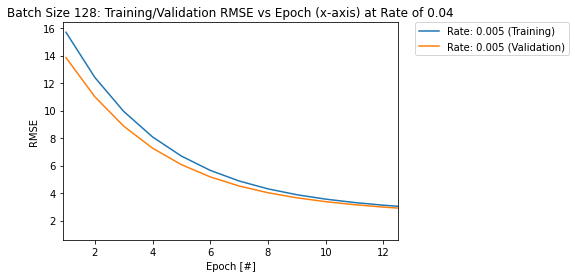

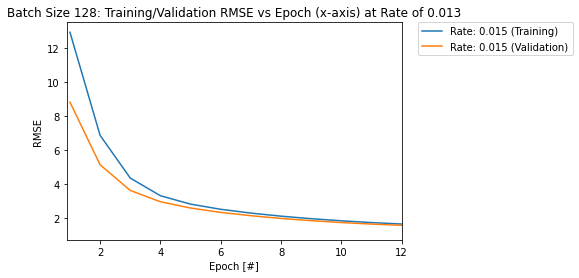

In [57]:
plt.figure()

plt.plot(epoch_list[0], rmse_train_list[0], label = f'Rate: {round(learning_rate_128[0],3)} (Training)')
plt.plot(epoch_list[0], rmse_val_list[0], label = f'Rate: {round(learning_rate_128[0],3)} (Validation)')
plt.xlabel('Epoch [#]')
plt.ylabel('RMSE')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim((0.9,12.5))
plt.title('Batch Size 128: Training/Validation RMSE vs Epoch (x-axis) at Rate of 0.05')
plt.show()

plt.figure()

plt.plot(epoch_list[-1], rmse_train_list[-1], label = f'Rate: {round(learning_rate_128[-1],3)} (Training)')
plt.plot(epoch_list[-1], rmse_val_list[-1], label = f'Rate: {round(learning_rate_128[-1],3)} (Validation)')
plt.xlabel('Epoch [#]')
plt.ylabel('RMSE')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim((0.9,12)) 
plt.title('Batch Size 128: Training/Validation RMSE vs Epoch (x-axis) at Rate of 0.015')
plt.show()

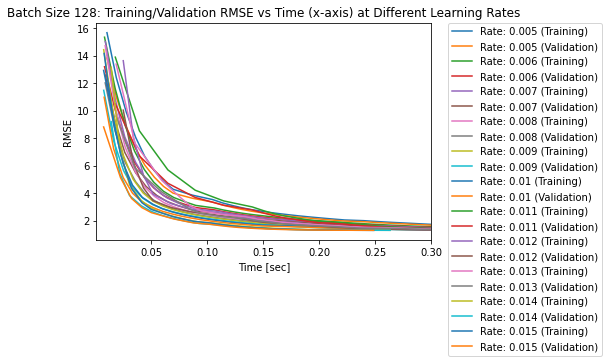

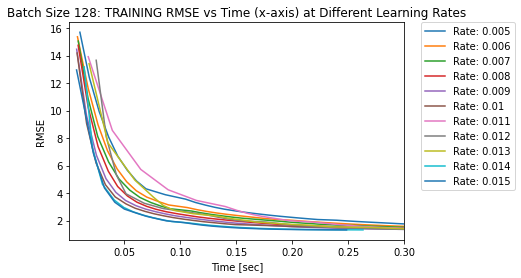

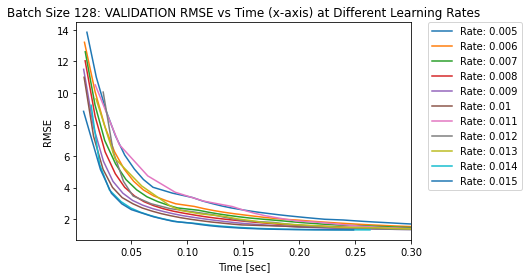

In [58]:
# plot: Training/Validation RMSE vs Time (x-axis) for all learning rates

# BOTH Training and Validation RMSE:
plt.figure()
for i in range(len(learning_rate_128)):   
  plt.plot(time_list[i], rmse_train_list[i], label = f'Rate: {round(learning_rate_128[i],3)} (Training)')
  plt.plot(time_list[i], rmse_val_list[i], label = f'Rate: {round(learning_rate_128[i],3)} (Validation)')
  plt.xlabel('Time [sec]')
  plt.ylabel('RMSE')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim((0.001,0.3)) 
plt.title('Batch Size 128: Training/Validation RMSE vs Time (x-axis) at Different Learning Rates')
plt.show()

# compare Training RMSE:
plt.figure()
for i in range(len(learning_rate_128)):   
  plt.plot(time_list[i], rmse_train_list[i], label = f'Rate: {round(learning_rate_128[i],3)}')
  plt.xlabel('Time [sec]')
  plt.ylabel('RMSE')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim((0.001,0.3)) 
plt.title('Batch Size 128: TRAINING RMSE vs Time (x-axis) at Different Learning Rates')
plt.show()

# compare Validation RMSE:
plt.figure()
for i in range(len(learning_rate_128)):   
  plt.plot(time_list[i], rmse_val_list[i], label = f'Rate: {round(learning_rate_128[i],3)}')
  plt.xlabel('Time [sec]')
  plt.ylabel('RMSE')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlim((0.001,0.3))
plt.title('Batch Size 128: VALIDATION RMSE vs Time (x-axis) at Different Learning Rates')
plt.show()

**NOTE: The lines for the RMSE values in the RMSE vs Time graph above does not start at 0 seconds as the first RMSE value was recorded after the first training process was complete (after the first epoch).**

**The optimal batch size based on fastest convergence time (optimal smaller batch size at a larger learning rate tradeoff) was 128.**

**The three plots above solidfy the fact that smaller learning rates take longer to converge compared to larger learning rates. This explains why it takes more epochs to converge with smaller learning rates. Specifically, the largest learning rate of 0.015 seems to converge after approximately 0.05 seconds, whereas the smallest learning rate of 0.005 seems to converge after approximately 0.30 seconds.**

## **5) Linear Regression with Optimal Gradient Descent Model**




**Optimal Model for Gradient Descent:**
- Batch Size = 128 
- Learning Rate = 0.015

**Batch size = 128 ... as it was the smallest batch size that converged from the previous parts, and it converged the quickest.**
- Batch sizes < 128 ... high risk of diverging or failing to converge
- Batch sizes > 128 ... takes much longer to converge

**Learning rate = 0.015 ... as it was the largest learning rate that converged from the previous parts, and it converged the quickest.**
- Learning rates < 0.015 ... converges much slower
- Learning rates > 0.015 ... risk of overshoot (diverge or fail to converge)

In [62]:
# convert dataframe to numpy array to use in function 
X_test_sc_arr = X_test_sc.to_numpy()

# convert series to numpy array in shape of (length, 1)
y_test_arr = y_test.to_numpy()[np.newaxis].T

In [63]:
#Mini-Batch Size: 2^7 = 128, Learning Rate = 0.013:
size = 128
rate = 0.015
w, rmse_train, rmse_test, epoch_time, epoch_list = minibatchGD(X_train_sc_arr, y_train_arr, X_test_sc_arr, y_test_arr, batch_size=size, rate=0.015, CT=1.001*RMSE_valid)

convergence after 16 epochs at convergence threshold: 1.3236768644292891


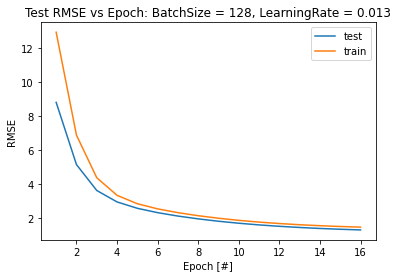

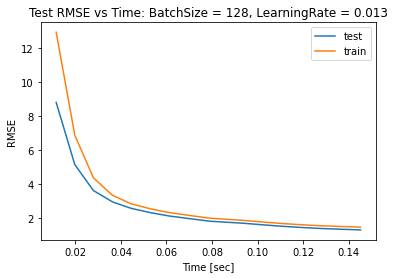

In [64]:
plt.figure()
plt.plot(epoch_list,rmse_test,label = 'test')
plt.plot(epoch_list,rmse_train, label = 'train')
plt.title('Test RMSE vs Epoch: BatchSize = 128, LearningRate = 0.013')
plt.xlabel('Epoch [#]')
plt.ylabel('RMSE')
plt.legend()
plt.show()

plt.figure()
plt.plot(epoch_time,rmse_test,label = 'test')
plt.plot(epoch_time,rmse_train, label = 'train')
plt.title('Test RMSE vs Time: BatchSize = 128, LearningRate = 0.013')
plt.xlabel('Time [sec]')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**The chosen model performs very well with the test data, as it converges quickly after only 16 epochs as seen in the two graphs above.** 

**The model generalizes well, as the RMSE of the test data is smaller (higher accuracy) compared to the training data.**



In [86]:
# 7 Features and 1 Target 'Temperature'
print(f'Features: \n{feature_data.columns} \n')
print(f'Target: \n{target_data.name}')

Features: 
Index(['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'],
      dtype='object') 

Target: 
Temperature(°C)


**Therefore, to predict the temperature of a day based on 7 features, the following weight parameters should be used in the linear regression (use linear regression with these weights as the 'predictor' of the temperature):**

In [81]:
# optimal weight parameters for linear regression:
print(f'There are {len(w[0])} weight parameters.')
print('First weight parameter is for the column of ONES and the remaining 7 weight parameters are for the 7 features. \n')
print(f'Weight parameters: {w}')

There are 8 weight parameters.
First weight parameter is for the column of ONES and the remaining 7 weight parameters are for the 7 features. 

Weight parameters: [[ 1.28510411e+01 -4.23909138e+00  3.84283182e-03  3.25547823e-01
   1.29872637e+01  1.09412617e+00  9.35079949e-02 -1.07842950e-01]]
